### Convolutional layers
- HOG, SHIFT 는 사람이 만든 hand-engineered 특징 
  - 입력 크기에 무관하게 연산

- Feature Maps : Convolution 한 결과는 고유한 특징과 위치를 알 수 있음을 시각화 통해 밝혀냄(ZFnet)

- R-CNN은 왜곡되어 성능이 떨어짐
  - Fully connected(Dense) layers가 classifier로 되어 있는 경우 Flatten한  크기가 상관 있어서 조정하는것
- SPP-net
  - SPP layer 통해서 이미지 크기에 상관없이 입력 받을 수 있음
  - Bag-of-words, Spatial Pyramid matching

- Fast R-CNN
  - single-scale로도 성능이 좋음
  - RoI Pooling

- Faster R-CNN
  - Region Proposal 를 selective serach, Edge Boxes 방식에서 Convolution 을 이용
    - feature 공유
  - 미리 지정된 크기가 상이한 9개의 anchors 사용
  - b-box regression
    - 위치가 있을 영역을 4점으로 예측
  - classification 
  - IoU (Intersection over Union) 기준을 잡아서 positive,negative 
  - Translation-invariant
 
- iccv2015_tutorial_convolutional_feature_maps_kaiminghe.pdf 참고

### data augmentation
> 서베이 논문으로 흐름 잡기
- 목적: **overfitting 방지**
  - VGG, Resnet 등## data augmentation
  - 목적: overfitting 방지
    - VGG, Resnet 등
    > survey 논문으로 흐름알기## overfitting 방지
    - data augmentation
      - VGG, Resnet 
-  알고리즘 : geometirc transforation, corlor space augmentation, random erasing, feature space augmentation, kernel filters, mixing images ...

1. **Image Transformation**
  - 이미지 자체를 규칙에 따라서 변형
  - Numpy, Scipy, Scikit-Image
    - vectorization
  - PIL, OpencV 
    - 쉽게 사용 가능
  - 1) **tensorflow 구현 방법**
    - `tf.keras.preprocessing.image.ImageDataGenerator`
    - `tf.keras.layers.experimental.preprocessing`
      - (1) **모델의 일부로 사용 **
      - (2)** map**

2. **Deep Learning **
  -VAE, AutoEncoder, StyleTransfer, GAN



###  tensorflow datasets
  - 딥러닝에 활용 가능한 데이터셋 제공하는 add-ons 있음


> 사용은 `_` , 설치는 `-`

In [1]:
#!pip install -U tensorflow-hub
import tensorflow_hub as hub

In [2]:
#!pip install -U tensorflow-datasets
import tensorflow_datasets as tfds

In [ ]:
!pip install -U tensorflow-datasets

이미지 저장하는 방법 중 Pandas DataFrame 

In [ ]:
tfds.as_dataframe
tfds.as_numpy

In [3]:
dir(tfds) #image, video, text ,,

['GenerateMode',
 'ImageFolder',
 'ReadConfig',
 'Split',
 'TranslateFolder',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__init__py3',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'api',
 'as_dataframe',
 'as_numpy',
 'audio',
 'builder',
 'builder_cls',
 'core',
 'decode',
 'deprecated',
 'disable_progress_bar',
 'download',
 'even_splits',
 'features',
 'folder_dataset',
 'image',
 'image_classification',
 'is_dataset_on_gcs',
 'list_builders',
 'load',
 'object_detection',
 'proto',
 'public_api',
 'question_answering',
 'show_examples',
 'show_statistics',
 'structured',
 'summarization',
 'sys',
 'testing',
 'text',
 'translate',
 'units',
 'version',
 'video',
 'visualization']

#### tfds.load
- 이름
  ### [TFDS 카탈로그](https://www.tensorflow.org/datasets/catalog/overview?hl=ko) 제공하는 데이터 세트 확인 가능
- as_supervised
- with_info
- split

In [5]:
tfds.load('tf_flowers') #hub 와 비슷 ,PrefetchDataset 

{'train': <PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>}

In [6]:
tfds.load('tf_flowers',as_supervised=True) #하나의 데이터 세트에 (X,y)

{'train': <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>}

In [7]:
tfds.load('tf_flowers',as_supervised=True, with_info=True) #DatasetInfo 추가됨 

({'train': <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>},
 tfds.core.DatasetInfo(
     name='tf_flowers',
     version=3.0.1,
     description='A large set of images of flowers',
     homepage='https://www.tensorflow.org/tutorials/load_data/images',
     features=FeaturesDict({
         'image': Image(shape=(None, None, 3), dtype=tf.uint8),
         'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
     }),
     total_num_examples=3670,
     splits={
         'train': 3670,
     },
     supervised_keys=('image', 'label'),
     citation="""@ONLINE {tfflowers,
     author = "The TensorFlow Team",
     title = "Flowers",
     month = "jan",
     year = "2019",
     url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
     redistribution_info=,
 ))

In [9]:
len(tfds.load('tf_flowers',as_supervised=True, with_info=True) )

2

In [10]:
a,b=tfds.load('tf_flowers',as_supervised=True, with_info=True) # 

In [11]:
b  #DatasetInfo

tfds.core.DatasetInfo(
    name='tf_flowers',
    version=3.0.1,
    description='A large set of images of flowers',
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    total_num_examples=3670,
    splits={
        'train': 3670,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
    redistribution_info=,
)

split
- train, test
- train, test, validation
  - 비율 설정 가능

In [13]:
tfds.load('tf_flowers',split=['train[:70%]','train[70%:80%]','train[80%:]']) 

[<PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 <PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 <PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>]

In [14]:
tfds.load('tf_flowers',split=['train[:70%]','train[70%:80%]','train[80%:90%]','train[90%:]']) 

[<PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 <PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 <PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 <PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>]

In [15]:
tfds.load('tf_flowers',split=('train[:70%]','train[70%:80%]','train[80%:90%]','train[90%:]')) 

(<PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 <PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 <PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 <PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>)

In [17]:
tfds.load('mnist') #이미 train,test 나뉘어져 있음

{'test': <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 'train': <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>}

In [29]:
(train,test,validation),info=tfds.load('tf_flowers',split=('train[:70%]','train[70%:80%]','train[80%:]'),
                 with_info=True, as_supervised=True)

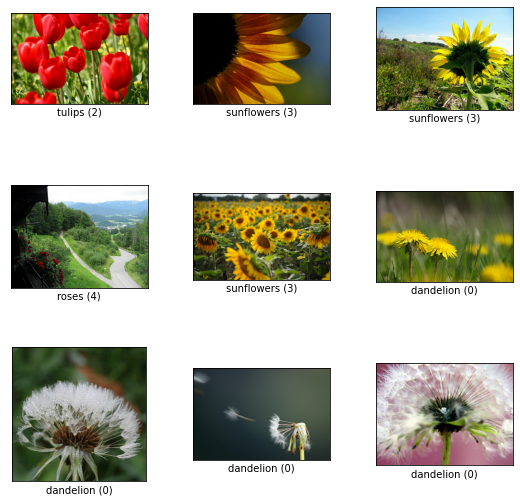

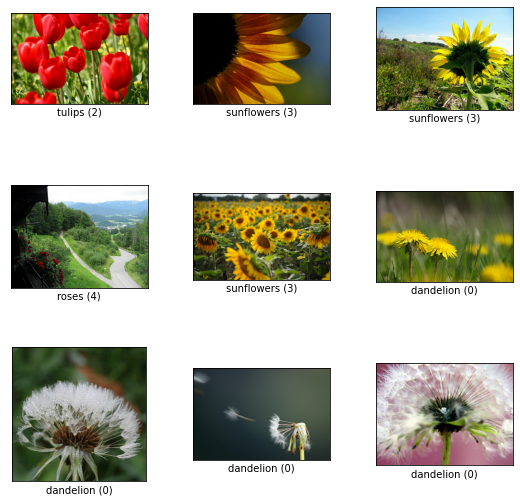

In [32]:
tfds.show_examples( train,info)  #이미지 시각화

In [37]:
df=tfds.as_dataframe(train,info) #속도 느림fds.as_dataframe(train,info) 
df

In [36]:
df.label.value_counts() # 이미지 클래스별 크기 -> EDA용이 

0    639
2    531
3    496
4    458
1    445
Name: label, dtype: int64

In [38]:
dir(info.features['label']) #사용 가능한 기능 확인

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_additional_repr_info',
 '_dtype',
 '_flatten',
 '_int2str',
 '_nest',
 '_num_classes',
 '_registered_features',
 '_shape',
 '_str2int',
 'decode_batch_example',
 'decode_example',
 'decode_ragged_example',
 'dtype',
 'encode_example',
 'from_config',
 'from_json',
 'from_json_content',
 'get_serialized_info',
 'get_tensor_info',
 'int2str',
 'load_metadata',
 'names',
 'num_classes',
 'repr_html',
 'repr_html_batch',
 'repr_html_ragged',
 'save_config',
 'save_metadata',
 'shape',
 'str2int',
 'to_json',
 'to_json_content']

In [44]:
info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
})

In [45]:
info.features['label'].num_classes

5

In [50]:
info.features['label'].names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [49]:
info.features['label'].int2str

<bound method ClassLabel.int2str of ClassLabel(shape=(), dtype=tf.int64, num_classes=5)>

In [48]:
dir(info.features['image'])

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_additional_repr_info',
 '_dtype',
 '_encode_image',
 '_encoding_format',
 '_flatten',
 '_nest',
 '_registered_features',
 '_runner',
 '_shape',
 'decode_batch_example',
 'decode_example',
 'decode_ragged_example',
 'dtype',
 'encode_example',
 'from_config',
 'from_json',
 'from_json_content',
 'get_serialized_info',
 'get_tensor_info',
 'load_metadata',
 'repr_html',
 'repr_html_batch',
 'repr_html_ragged',
 'save_config',
 'save_metadata',
 'shape',
 'to_json',
 'to_json_content']

1장의 사진만 추출하는 방법 3가지
- for ~ break
- take
- iter

In [52]:
for i in train.take(1):
  print(i)

(<tf.Tensor: shape=(333, 500, 3), dtype=uint8, numpy=
array([[[ 93, 122,  30],
        [ 90, 118,  31],
        [ 88, 118,  28],
        ...,
        [247,  77,  78],
        [253,  87,  87],
        [255,  76,  75]],

       [[ 98, 125,  30],
        [ 95, 124,  32],
        [ 96, 125,  32],
        ...,
        [247,  81,  83],
        [250,  86,  84],
        [252,  71,  64]],

       [[ 98, 126,  26],
        [101, 128,  31],
        [106, 132,  33],
        ...,
        [254,  81,  85],
        [254,  79,  76],
        [252,  55,  47]],

       ...,

       [[ 35,  51,   6],
        [ 21,  49,   0],
        [ 30,  57,   6],
        ...,
        [224, 239,  78],
        [192, 208,  50],
        [ 88,  54,  53]],

       [[ 65,  73,  32],
        [ 20,  46,   0],
        [ 22,  48,   0],
        ...,
        [230, 236,  74],
        [230, 246,  62],
        [ 88,  57,  36]],

       [[ 95,  97,  60],
        [ 15,  41,   0],
        [ 23,  51,   3],
        ...,
        [210, 224,  

In [56]:
for i in train:
  print(i)
  break

(<tf.Tensor: shape=(333, 500, 3), dtype=uint8, numpy=
array([[[ 93, 122,  30],
        [ 90, 118,  31],
        [ 88, 118,  28],
        ...,
        [247,  77,  78],
        [253,  87,  87],
        [255,  76,  75]],

       [[ 98, 125,  30],
        [ 95, 124,  32],
        [ 96, 125,  32],
        ...,
        [247,  81,  83],
        [250,  86,  84],
        [252,  71,  64]],

       [[ 98, 126,  26],
        [101, 128,  31],
        [106, 132,  33],
        ...,
        [254,  81,  85],
        [254,  79,  76],
        [252,  55,  47]],

       ...,

       [[ 35,  51,   6],
        [ 21,  49,   0],
        [ 30,  57,   6],
        ...,
        [224, 239,  78],
        [192, 208,  50],
        [ 88,  54,  53]],

       [[ 65,  73,  32],
        [ 20,  46,   0],
        [ 22,  48,   0],
        ...,
        [230, 236,  74],
        [230, 246,  62],
        [ 88,  57,  36]],

       [[ 95,  97,  60],
        [ 15,  41,   0],
        [ 23,  51,   3],
        ...,
        [210, 224,  

In [54]:
next(iter(train))

(<tf.Tensor: shape=(333, 500, 3), dtype=uint8, numpy=
 array([[[ 93, 122,  30],
         [ 90, 118,  31],
         [ 88, 118,  28],
         ...,
         [247,  77,  78],
         [253,  87,  87],
         [255,  76,  75]],
 
        [[ 98, 125,  30],
         [ 95, 124,  32],
         [ 96, 125,  32],
         ...,
         [247,  81,  83],
         [250,  86,  84],
         [252,  71,  64]],
 
        [[ 98, 126,  26],
         [101, 128,  31],
         [106, 132,  33],
         ...,
         [254,  81,  85],
         [254,  79,  76],
         [252,  55,  47]],
 
        ...,
 
        [[ 35,  51,   6],
         [ 21,  49,   0],
         [ 30,  57,   6],
         ...,
         [224, 239,  78],
         [192, 208,  50],
         [ 88,  54,  53]],
 
        [[ 65,  73,  32],
         [ 20,  46,   0],
         [ 22,  48,   0],
         ...,
         [230, 236,  74],
         [230, 246,  62],
         [ 88,  57,  36]],
 
        [[ 95,  97,  60],
         [ 15,  41,   0],
         [ 23,

In [63]:
for i,j in train.take(1):
  pass

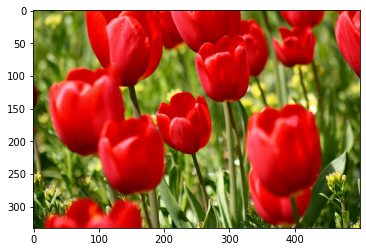

In [68]:
import matplotlib.pyplot as plt
plt.imshow(i)

### Data Augmentaion 하는 법 2가지
- tf.keras.preprocessing.image.ImageDataGenerator
- tf.keras.layers.experimental.preprocessing

In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator

### RandomFlip
- 랜덤하게 상하좌우반전

In [59]:
rf=tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical') #이미지 반전

In [67]:
rf(i[tf.newaxis])  #4차원으로 입력받음 (batch, h,w,c)

<tf.Tensor: shape=(1, 333, 500, 3), dtype=uint8, numpy=
array([[[[ 93, 122,  30],
         [ 90, 118,  31],
         [ 88, 118,  28],
         ...,
         [247,  77,  78],
         [253,  87,  87],
         [255,  76,  75]],

        [[ 98, 125,  30],
         [ 95, 124,  32],
         [ 96, 125,  32],
         ...,
         [247,  81,  83],
         [250,  86,  84],
         [252,  71,  64]],

        [[ 98, 126,  26],
         [101, 128,  31],
         [106, 132,  33],
         ...,
         [254,  81,  85],
         [254,  79,  76],
         [252,  55,  47]],

        ...,

        [[ 35,  51,   6],
         [ 21,  49,   0],
         [ 30,  57,   6],
         ...,
         [224, 239,  78],
         [192, 208,  50],
         [ 88,  54,  53]],

        [[ 65,  73,  32],
         [ 20,  46,   0],
         [ 22,  48,   0],
         ...,
         [230, 236,  74],
         [230, 246,  62],
         [ 88,  57,  36]],

        [[ 95,  97,  60],
         [ 15,  41,   0],
         [ 23,  51

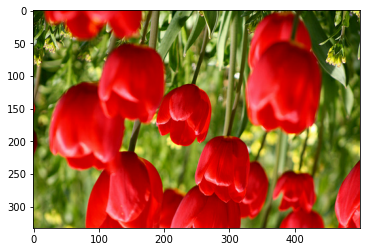

In [71]:
plt.imshow(rf(i[tf.newaxis]).numpy()[0] ) #다시 3차원

#### RandomRotation
- 랜덤하게 회전

In [78]:
rr = tf.keras.layers.experimental.preprocessing.RandomRotation((-0.4,0.3), ) #좌우 반전

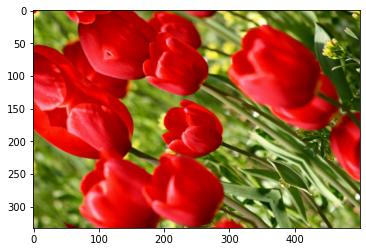

In [79]:
plt.imshow(rr(i[tf.newaxis]).numpy()[0] ) 

In [ ]:
tf.keras.layers.experimental.preprocessing.RandomCrop #좌우 반전

- transfer learning
  - 이미 학습되어 있어서 데이터가 덜 필요함
  - data augmentation 사용해서  overfitting 막기

In [80]:
import tensorflow_hub as hub

레이어 2가지
1. 이론 
2. tf 자체에서 편의성 위해서
  - 모델 일부

In [81]:
hub.keras_layer 

<module 'tensorflow_hub.keras_layer' from '/usr/local/lib/python3.7/dist-packages/tensorflow_hub/keras_layer.py'>

- feature extractor
- fine-tuning

In [127]:
inputs=tf.keras.Input(shape=(None,None,3 ))  #크기 미지정해서 이미지 크기 상관 없이 입력 받음
#모델의 일부
x= tf.keras.layers.experimental.preprocessing.RandomZoom((0.2,0.3))(inputs)
x= tf.keras.layers.experimental.preprocessing.RandomRotation((-0.2,0.3))(x)
outputs=tf.keras.layers.Conv2D(32,3,activation='relu')(x)

In [128]:
model=tf.keras.models.Model(inputs=inputs, outputs=outputs)#multi-inputs,multi-outputs eg. Resnet

In [102]:
(train,test,validation),info=tfds.load('tf_flowers',split=('train[:70%]','train[70%:80%]','train[80%:]'),
                 with_info=True, as_supervised=True)

- tfds 는 함수형 패러다임에 귀찮음


In [104]:
model.compile(loss='sparse_categorical_crossentropy')

1. 모델의 일부
- 변환 쉬움
- fit 하는 순간에만 증강해서 테스트 어려움
- 예시 참고 : https://www.tensorflow.org/tutorials/images/classification


 

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

2. map
- 별도의 전처리 레이어로 함수 적용용
- CPU에서 비동기적 실행: A 실행 여부와 상관 없이 바로 B 실행
- 기본적으로 CPU, Dataset.prefetch 사용해서 GPU 사용

> 전용 라이브러리 활용


In [117]:
IMG_SIZE = 180
#resize, rescla, 데이터 증강 함수 
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [120]:
batch_size = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE        #CPU,GPU 병렬처리해서 속도 향상

def prepare(ds, shuffle=False, augment=False):
  # 위에 정의한 함수를 적용
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefecting on all datasets
  return ds.prefetch(buffer_size=AUTOTUNE)

In [121]:
#데이터에 직접 적용
train= prepare(train, shuffle=True, augment=True)
validation = prepare(validation)
test = prepare(test)